In [1]:
import os 
from datetime import date
from matplotlib import pyplot as plt
import numpy as np

# we need to set the current path to the directory
# containing the suite3d repository, this hack should
# do the trick
os.chdir(os.path.dirname(os.path.abspath("")))

from suite3d.job import Job
from suite3d import io
from suite3d import plot_utils as plot
from curation import run_preprocessing

In [2]:
# update this to point to the demo data! 
tifs = io.get_tif_paths(r'C:\Users\suyash\UCL\s3d_demo_data\standard-2p')[:10]
for tif in tifs: print(tif)

C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00001.tif
C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00002.tif
C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00003.tif
C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00004.tif
C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00005.tif
C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00006.tif
C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00007.tif
C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00008.tif
C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00009.tif
C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00010.tif


In [3]:
# Set the mandatory parameters
params = {
    # volume rate
    'fs': io.get_vol_rate(tifs[0]),
    
    # planes to analyze. 0 is typically the flyback, so we exclude it here
    'planes' : np.array([1,2,3,4]), 
    # number of planes recorded by scanimage, including the flyback
    'n_ch_tif' : 5,
    
    # Decay time of the Ca indicator in seconds. 1.3 for GCaMP6s. This example is for GCamP8m
    'tau' : 1.3,
    'lbm' : False, 
    'num_colors' : 2, # how many color channels were recorded by scanimage
    'functional_color_channel' : 0, # which color channel is the functional one
     # voxel size in z,y,x in microns
    'voxel_size_um' : (20, 1.5, 1.5),

    # number of files to use for the initial pass
    # usually, ~500 frames is a good rule of thumb
    # we will just use 200 here for speed
    'n_init_files' :  2,

    # 3D GPU registration - fast! 
    '3d_reg' : True,
    'gpu_reg' : True,
    
    # note : 3D CPU is not supported yet
    'subtract_crosstalk' : False, # turn off some lbm-only features
    'fuse_strips' : False, # turn off some lbm-only features

    
}

In [4]:
# Create the job
job = Job(r'C:\Users\suyash\UCL\s3d_demo_data','demo-std', tifs = tifs,
          params=params, create=True, overwrite=True, verbosity = 3)

Job directory C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std already exists
Loading job directory for demo-std in C:\Users\suyash\UCL\s3d_demo_data
   Loading dirs 
   Loading default params
      Updating param fs
      Updating param planes
      Updating param n_ch_tif
      Updating param tau
      Updating param lbm
      Updating param num_colors
      Updating param functional_color_channel
      Updating param voxel_size_um
      Updating param n_init_files
      Updating param 3d_reg
      Updating param gpu_reg
      Updating param subtract_crosstalk
      Updating param fuse_strips
   Updated main params file


In [5]:
job.run_init_pass()

   Saved a copy of params at C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\summary
   Updated main params file
Launching initial pass
Saving summary to C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\summary\summary.npy
   Loading init tifs with 5 channels
      Loading tiff 1/2: C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00004.tif
      Loading tiff 2/2: C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00007.tif
   Loaded 2 files, total 1.56 GB
   Selecting 500 random frames from the init tif files
   Loaded movie with 500 frames and shape 4, 512, 512
      Enforcing positivity in mean image
   No crosstalk estimation or subtraction
   Using 3d registration
   Computing plane alignment shifts
   Applying plane alignment shifts
   Launching 3D GPU reference image calculation
      Seeding reference image with most active frames
      Completed iter 1 out of 8 in  3.53s using  69/500 frames
      Completed iter 2 out of 8 in 

In [6]:
# If you have large tiffs, split the large tiffs into files of size 100 after registration
job.params['split_tif_size'] = 100

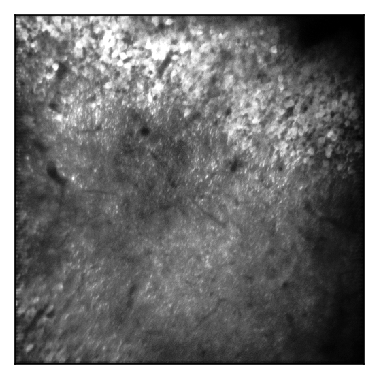

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [7]:
# OPTIONAL: load and take a look at the reference image
summary = job.load_summary()
ref_img = summary['ref_img_3d']

# # view 1 plane at a time
plot.show_img(ref_img[3], figsize=(3,4))

# # interactive 3D viewer
plot.VolumeViewer(ref_img)


In [8]:
job.register()

      Found dir C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\registered_fused_data
      Updating self.dirs tag registered_fused_data
   Saved a copy of params at C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\registered_fused_data
   Updated main params file
   Starting registration: 3D: True, GPU: True
   Not clipping frames for registration
Will analyze 10 tifs in 10 batches
   Enforcing positivity
   Launching IO thread
         Memory at batch 0.  Total Used: 024.560 GB, Virtual Available: 039.413 GB, Virtual Used: 024.405 GB, Swap Used: 000.155 GB
Loading Batch 0 of 9
      Loading tiff 1/1: C:\Users\suyash\UCL\s3d_demo_data\standard-2p\2023-04-12_701_ATL020_2P_00001_00001.tif
   Loaded 1 files, total 0.78 GB
   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 025.355 GB, Virtual Available: 038.618 GB, Virtual Used: 025.199 GB, Swap Used: 000.155 GB
         Memory after movie copied from threadTotal Used: 026.141 GB, Virtual Available: 037.832 GB, Virtu

In [9]:
corr_map = job.calculate_corr_map()

      Found dir C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\corrmap
      Updating self.dirs tag corrmap
      Found dir C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\mov_sub
      Updating self.dirs tag mov_sub
   Updated detection_timebin to 23 based on framerate and tau
   Saved a copy of params at C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\corrmap
   Updated main params file
   Computing correlation map of movie with 4000 frames, volume shape: 4, 514, 513
      Running batch 1 of 5
      Binning with timebin of size 23
         Timer batch_timebin completed in 0.265 sec
         Timer prep completed in 1.041 sec
         Timer batch_setup completed in 0.030 sec
         Timer batch_edgecrop completed in 0.003 sec
         Timer accum_meanmeax completed in 0.024 sec
         Timer batch_rolling_mean_filt completed in 0.019 sec
         Timer batch_accum_sdmov completed in 0.086 sec
         Timer batch_norm_sdmov completed in 0.015 sec
         Loading movie of size (34, 4, 

In [10]:
res = job.load_corr_map_results()
vmap = res['vmap']

In [11]:
job.params['patch_size_xy'] = (550, 550)
# for speed, only segment a single patch
job.segment_rois()

      Found dir C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\segmentation
      Updating self.dirs tag segmentation
   Saved a copy of params at C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\segmentation
   Updated main params file
      Found dir C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois
      Updating self.dirs tag rois
   Saving results to C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\segmentation and C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois 
dict_keys(['max_img', 'mean_img', 'vmap', 'vmap_raw', 'all_params'])
   Detecting from patch 1 / 1
      Found dir C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\segmentation\patch-0000
         Loading 0.33 GB movie to memory, shape: (170, 4, 514, 513) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 0.100 and Th2: 5.000
         Iter 0000: running 16 ROIs in parallel
         Added cell 1 at 01, 358, 431, peak: 4.794, thresh: 5.000, 22 frames, 7

'C:\\Users\\suyash\\UCL\\s3d_demo_data\\s3d-demo-std\\rois'

In [12]:
job.compute_npil_masks()
traces = job.extract_and_deconvolve()

   Updated main params file
   Movie shape: (4, 4000, 514, 513)
1484
   Extracting 1484 valid cells, and saving cell flags to C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\iscell_extracted.npy
   Extracting activity
         Will extract in 8 batches of 500
   Saving intermediate results to C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois
   Deconvolving
   Saving to C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois


In [13]:
job.export_results(r"C:\Users\suyash\UCL\s3d_demo_data\output",result_dir_name='rois')

   Created dir C:\Users\suyash\UCL\s3d_demo_data\output\s3d-results-demo-std to export results
      Loading from C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\stats_small.npy
      Loading from C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\info.npy
      Loading from C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\F.npy
      Loading from C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\spks.npy
      Loading from C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\Fneu.npy
      Loading from C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\iscell.npy
      Overwriting existing C:\Users\suyash\UCL\s3d_demo_data\output\s3d-results-demo-std\s3d-params.npy
      Overwriting existing C:\Users\suyash\UCL\s3d_demo_data\output\s3d-results-demo-std\frames.npy
      Overwriting existing C:\Users\suyash\UCL\s3d_demo_data\output\s3d-results-demo-std\stats.npy
      Saved stats.npy to C:\Users\suyash\UCL\s3d_demo_data\output\s3d-results-demo-std
      Overwriting existing C:

To take a look at the outputs in napari, navigate to the suite3d directory in a command shell and run the following:
```
python curation.py curation --output_dir /path/to/output/rois
```

In [14]:
# Run the curation pipeline
run_preprocessing.preprocess(job.job_dir)

Suite3D Processing Pipeline
Data directory: C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std
Output directory: C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\curation
Box size (z,y,x): (5, 20, 20)
Found 1 sessions to process
Output directory: C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\curation

[1/1] Processing session: rois
Saving patches to C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\curation\rois_patches.npy
✓ Session rois completed

Creating combined dataset from 1 sessions...
Total cells across all sessions: 1484
Initializing combined array...
Loading rois: 1484 cells
Saving combined patches to C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\curation\all_sessions_patches.npy
✓ Combined dataset saved with 1484 cells

PROCESSING COMPLETE
Sessions processed: 1
Total cells extracted: 1484
Output directory: C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\curation
  - all_sessions_patches.npy (1484 cells)
  - all_sessions_info.npy
H5 dataset created at C:\Use

c:\Users\suyash\miniconda3\envs\suite3d\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Pipeline complete. Results saved to: C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\rois\curation


Now you can run the UI for the whole Suite3D pipeline.
This should open in your browser automatically.

In [14]:
! panel serve webui/webui.py --show --port 5006

^C


2026-01-12 16:33:07,195 Starting Bokeh server version 3.8.1 (running on Tornado 6.5.2)
2026-01-12 16:33:07,196 User authentication hooks NOT provided (default user enabled)
2026-01-12 16:33:07,199 Bokeh app running at: http://localhost:5006/webui
2026-01-12 16:33:07,199 Starting Bokeh server with process id: 56728
2026-01-12 16:33:13,563 W-1000 (MISSING_RENDERERS): Plot has no renderers: figure(id='p1126', ...)
2026-01-12 16:33:13,563 W-1000 (MISSING_RENDERERS): Plot has no renderers: figure(id='p1206', ...)
2026-01-12 16:33:13,563 W-1000 (MISSING_RENDERERS): Plot has no renderers: figure(id='p1241', ...)
2026-01-12 16:33:13,563 W-1000 (MISSING_RENDERERS): Plot has no renderers: figure(id='p1091', ...)
2026-01-12 16:33:13,563 W-1000 (MISSING_RENDERERS): Plot has no renderers: figure(id='p1276', ...)
2026-01-12 16:33:13,563 W-1000 (MISSING_RENDERERS): Plot has no renderers: figure(id='p1056', ...)
2026-01-12 16:33:13,687 WebSocket connection opened
2026-01-12 16:33:13,688 ServerConnecti

/mnt/md0/runs
Updating
title is Reference Volume
title is Registered Mean Image
title is Correlation Map
C:\Users\suyash\UCL\s3d_demo_data
Updating
loaded:  False
Loading C:\Users\suyash\UCL\s3d_demo_data s3d-demo-std
   Found and loaded params from C:\Users\suyash\UCL\s3d_demo_data\s3d-demo-std\params.npy
   Replacing C:\Users\suyash\UCL\s3d_demo_data\ with C:\Users\suyash\UCL\s3d_demo_data
Vol update call!! 
Updated data!
Loading images
Loaded images
Rendering volume
Vol update call!! 
Updated data!
mean_fluorescence
(40, 4)
[[1027.5211  1249.3226  1337.6259   970.0126 ]
 [1059.7982  1271.4142  1326.3518   949.43915]
 [1055.3998  1270.3384  1320.2388   933.41595]
 [1053.8898  1264.2332  1306.002    920.8934 ]
 [1057.5558  1260.8721  1303.3744   918.0668 ]
 [1039.3302  1238.9036  1279.3423   902.98926]
 [1040.5643  1243.8472  1278.1493   895.82635]
 [1041.6432  1237.2035  1266.867    885.2686 ]
 [1040.7256  1232.6703  1256.5836   882.2248 ]
 [1041.6853  1235.9784  1245.1053   872.4996